In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\flat_chessboard.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

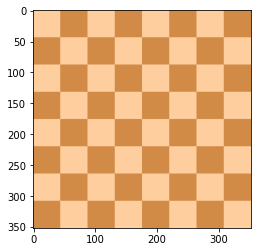

In [3]:
plt.imshow(img)

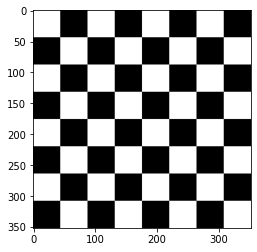

In [5]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')

In [10]:
gray = np.float32(gray_img)

In [11]:
dst = cv2.cornerHarris(gray, blockSize=2, ksize=5, k=0.05)

In [12]:
dst = cv2.dilate(dst, None)

In [13]:
img[dst > 0.01*dst.max()] = [255,0,0]

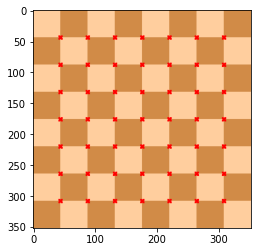

In [14]:
plt.imshow(img)

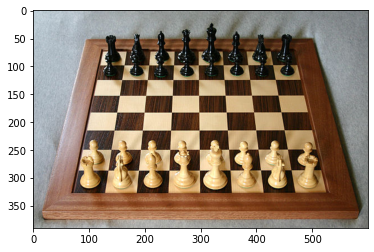

In [33]:
real_img = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\real_chessboard.jpg')
real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
plt.imshow(real_img)

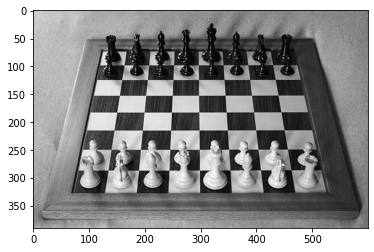

In [22]:
gray_real_img = cv2.cvtColor(real_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_img, cmap='gray')

In [23]:
real_dst = cv2.cornerHarris(gray_real_img, 2, 5, 0.05)


In [26]:
real_dst

array([[ 2.0405118e-06,  2.0405118e-06,  2.7261801e-06, ...,
         1.1016314e-05,  6.5139507e-06, -2.0652806e-06],
       [ 2.0405118e-06,  2.0405118e-06,  2.7261801e-06, ...,
         1.1016314e-05,  6.5139507e-06, -2.0652806e-06],
       [-1.8498135e-06, -1.8498135e-06, -6.0469733e-06, ...,
        -4.2380320e-06, -5.8456480e-06, -6.2278350e-06],
       ...,
       [ 8.1219754e-05,  8.1219754e-05, -1.9405357e-05, ...,
        -6.6796906e-07,  2.6712630e-06,  2.0065645e-06],
       [ 1.7787205e-04,  1.7787205e-04, -2.1195857e-04, ...,
        -3.9987071e-07,  3.4398968e-06,  2.3221901e-08],
       [ 2.0291031e-04,  2.0291031e-04,  5.5238263e-05, ...,
         3.9539430e-09,  9.7451232e-07, -4.9820403e-07]], dtype=float32)

In [27]:
real_dst.max()

2.1457584

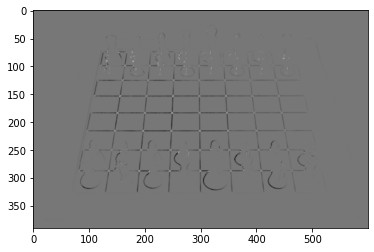

In [25]:
plt.imshow(real_dst, cmap='gray')

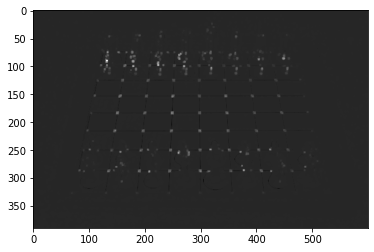

In [29]:
real_dst_dilate = cv2.dilate(real_dst, None)
plt.imshow(real_dst_dilate, cmap='gray')

In [30]:
real_dst_dilate.max()

2.1457584

In [34]:
real_img[real_dst_dilate > 0.01*real_dst_dilate.max()] = [0,255,0]

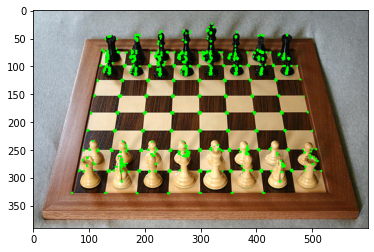

In [35]:
plt.imshow(real_img)

In [54]:
img = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\flat_chessboard.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

real_img = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\real_chessboard.jpg')
real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_real_img = cv2.cvtColor(real_img, cv2.COLOR_RGB2GRAY)

In [43]:
corner = cv2.goodFeaturesToTrack(gray_img, maxCorners=100, qualityLevel=0.01, minDistance=10)
corner = np.int0(corner)

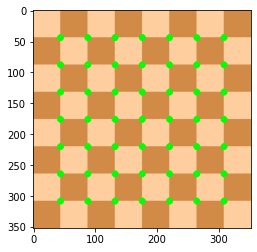

In [44]:
for i in corner:
    x,y = i.ravel()
    cv2.circle(img, (x,y), 3, (0,255,0), 3)

plt.imshow(img)

In [52]:
real_corner = cv2.goodFeaturesToTrack(gray_real_img, 80, 0.01, 10)
real_corner = np.int0(real_corner)

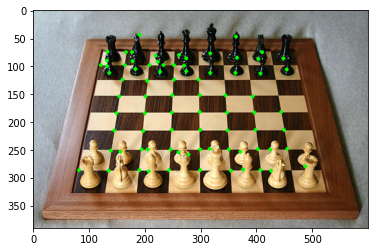

In [55]:
for c in real_corner:
    x,y = c.ravel()
    cv2.circle(real_img, (x,y), 2, (0,255,0), 2)

plt.imshow(real_img)